# Plot the number of think tanks active per year
For this, download all xls from https://data.europa.eu/data/datasets/transparency-register?locale=en \
or download here: https://drive.google.com/file/d/1bjOR4DmD19ua6waTxl58XqDse6nqoaDC/view?usp=sharing \
For both JANUARY and JUNE 

In [ ]:
import pandas as pd
import os
# Initialize an empty dictionary to store the results
yearly_counts = {}

# Path to the folder containing the Excel files
folder_path = '/mnt/2To/jupyter_data/FTM/ThinkTank/all_datasets/xls/'



# Loop through each file in the folder
for file_name in sorted(os.listdir(folder_path)):
    if file_name.endswith('.xls'):
        # Extract the year from the file name
        year = file_name.split('_')[0]
        month = file_name.split('_')[1].split('.')[0]
        # Read the Excel file
        df = pd.read_excel(os.path.join(folder_path, file_name))
        cat1='Category of registration'
        cat2='Head office country'
        think_thank = 'IV - Think tanks, research and academic institutions'
        #Shitshow because of change in the dataset naming
        match int(year):
            case 2015:
                cat1 = 'MAIN_CATEGORY'
                cat2 = 'CONTCAT_COUNTRY'
            case 2016:
                cat1 = 'Section'
            case 2017:
                cat1 = 'Section'
            case 2018:
                cat1 = 'Section'
            case 2019:
                cat1 = 'Section'
            case 2020:
                cat1 = 'Section'
            case 2021:
                cat1 = 'Section'
            case 2022:
                cat1 = 'Section' if month == '01' else 'Category of registration'
                think_thank = think_thank if month == '01' else 'Think tanks and research institutions'
            case 2023:
                cat1 = 'Category of registration'
                think_thank = 'Think tanks and research institutions'
            case 2024 :
                cat1 = 'Category of registration'
                think_thank = 'Think tanks and research institutions'

        # Filter to only thinktanks
        filtered_df = df[df[cat1] == think_thank]
        
        filtered_df[cat2] = filtered_df[cat2].str.lower()
        country_counts = filtered_df[cat2].value_counts()
        
        #Store
        yearly_counts[f'{year}-{month}'] = country_counts.to_dict()



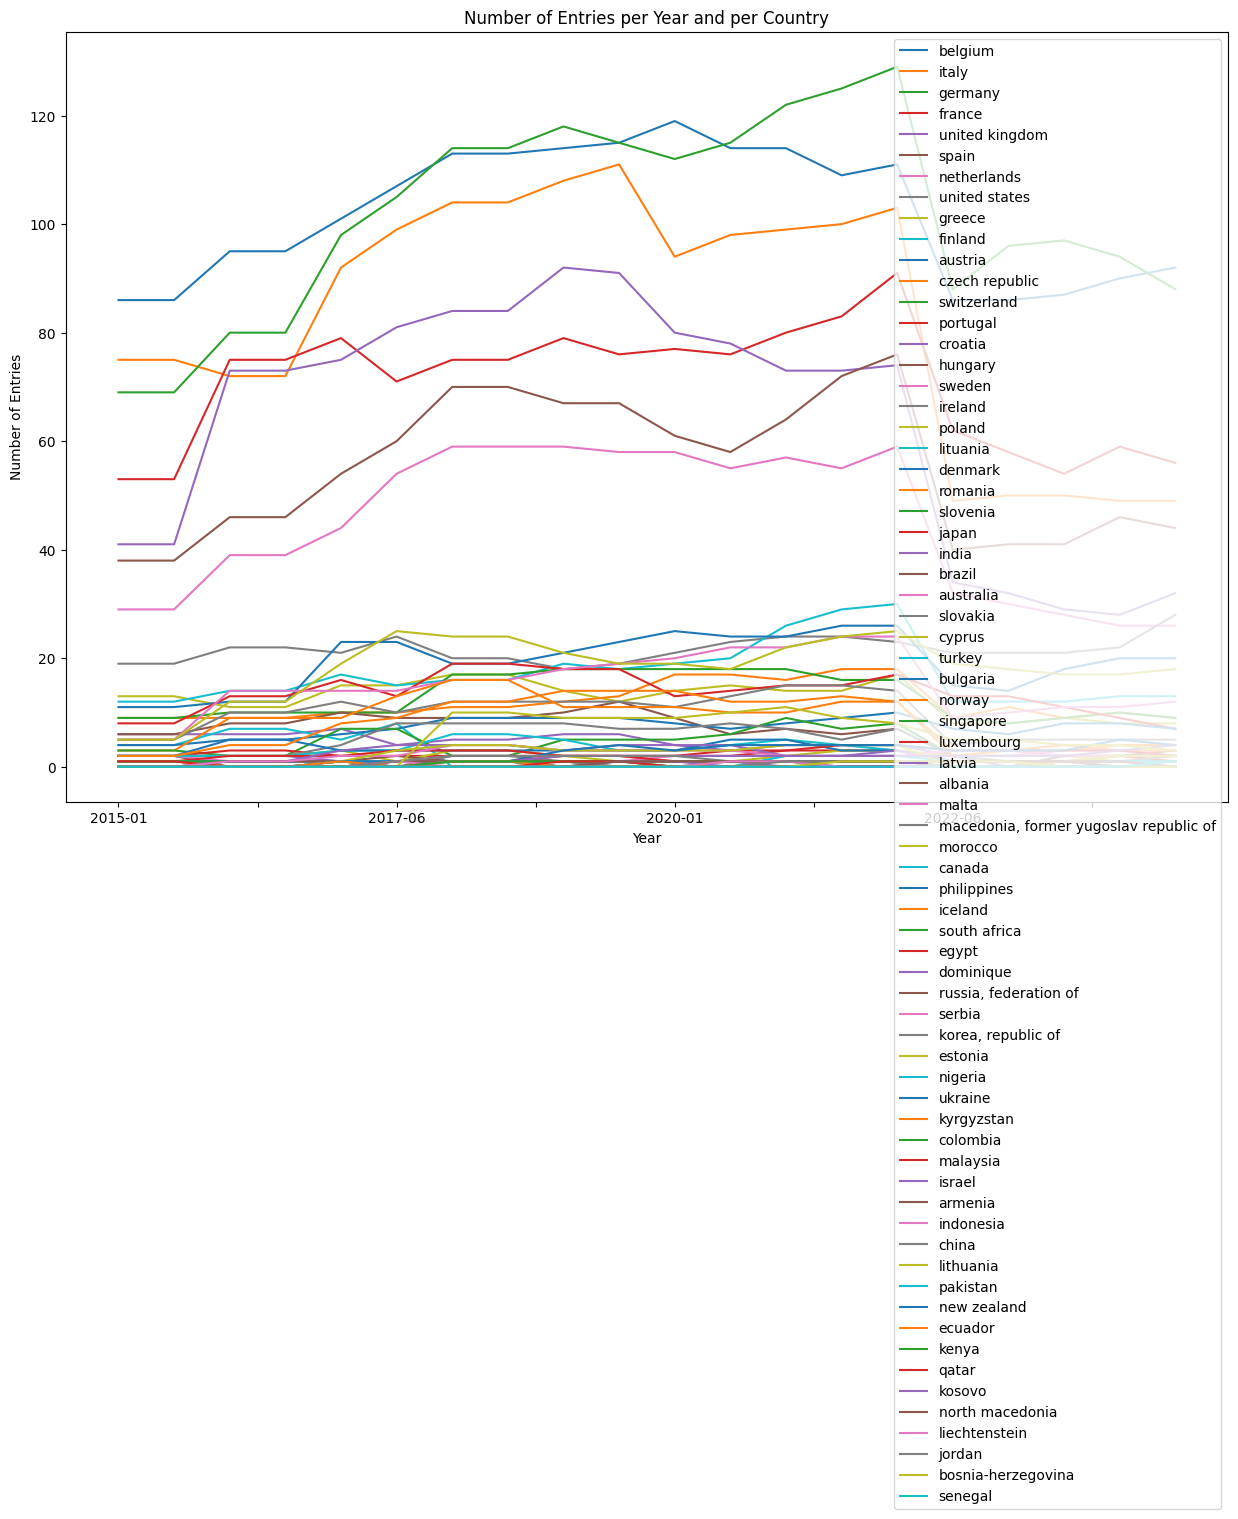

In [103]:
import matplotlib.pyplot as plt

#Transpose then plot
yearly_counts_df = pd.DataFrame(yearly_counts).fillna(0)
yearly_counts_df_transposed = yearly_counts_df.transpose()

yearly_counts_df_transposed.plot(kind='line', figsize=(15, 10), title='Number of Entries per Year and per Country')

# Set the labels
plt.xlabel('Year')
plt.ylabel('Number of Entries')

# Show the plot
plt.show()

## For US Think tanks only

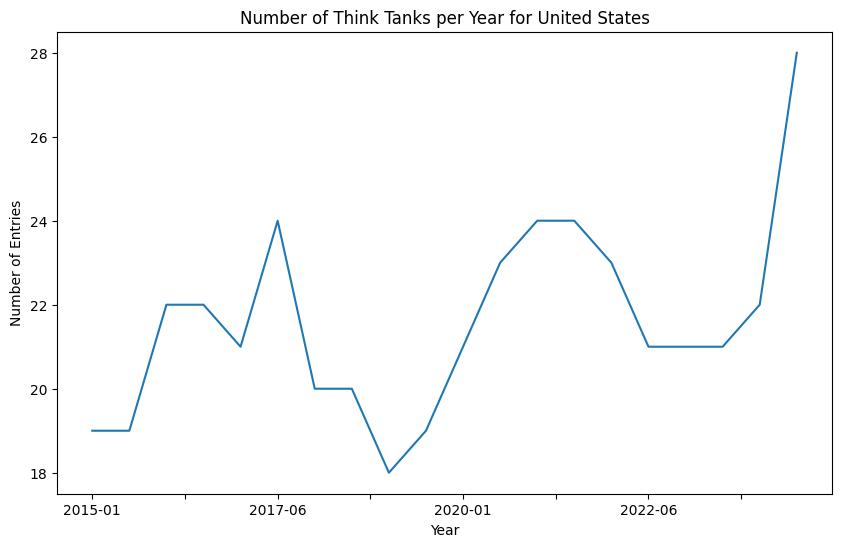

In [107]:
# Plot the values for 'united states' per year
yearly_counts_df.loc['united states'].plot(kind='line', figsize=(10, 6), title='Number of Think Tanks per Year for United States')

# Set the labels
plt.xlabel('Year')
plt.ylabel('Number of Entries')

# Show the plot
plt.show()

## Top 10 countries

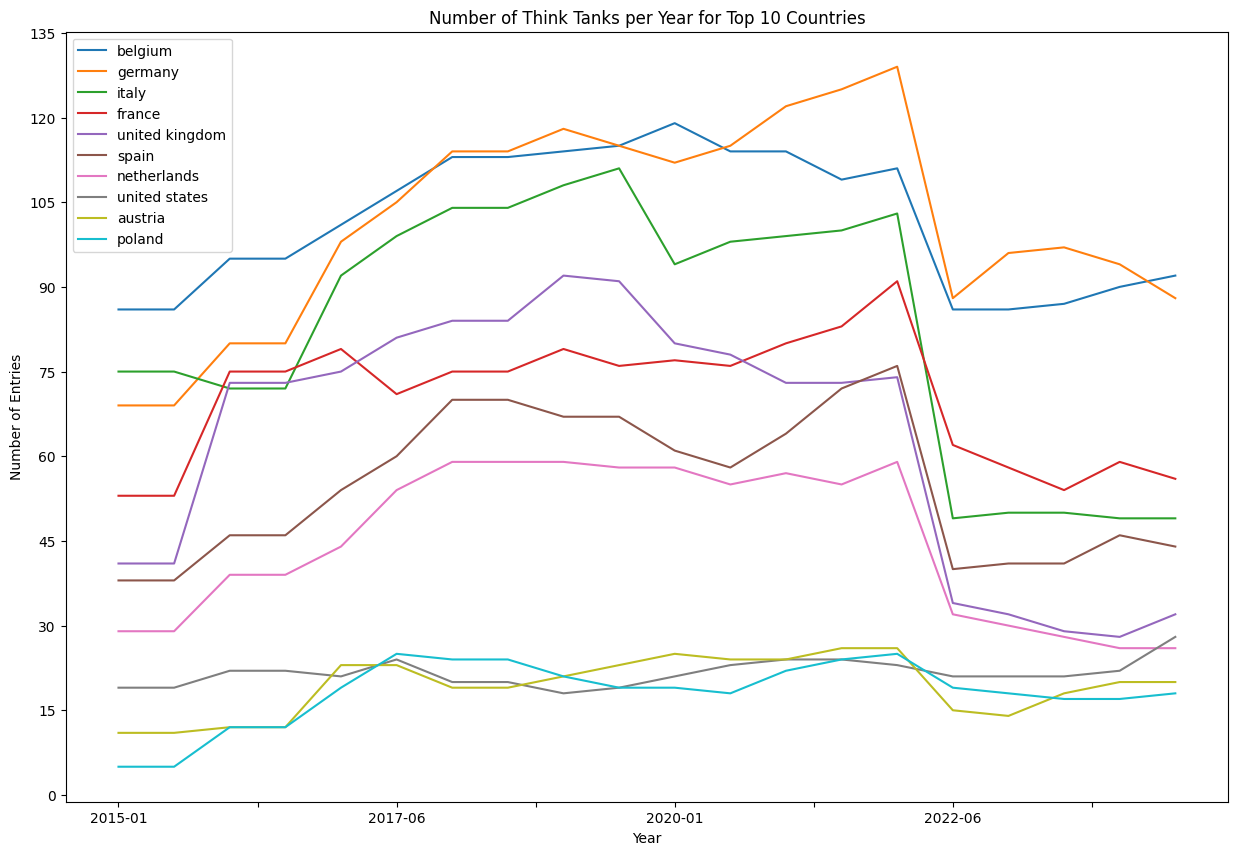

In [106]:
# sum for best 10
top_10_countries = yearly_counts_df.sum(axis=1).nlargest(10).index

# plot best 10
ax = yearly_counts_df.loc[top_10_countries[0]].plot(kind='line', figsize=(15, 10), title='Number of Think Tanks per Year for Top 10 Countries')
for country in top_10_countries[1:]:
    yearly_counts_df.loc[country].plot(kind='line', ax=ax)

# Set the labels
plt.xlabel('Year')
plt.ylabel('Number of Entries')
plt.legend(top_10_countries)
ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Show the plot
plt.show()